Meaghan Woody
UP 213
Spring 2025

### What are the most important predictors of SNAP underenrollment for LA County and for each SPA?

American Community Survey 2023

All the predictors: https://api.census.gov/data/2023/acs/acs5/variables.html

Demographics

    % foreign-born 
        B05002_021E = Estimate!!Total:!!Foreign-born:!!Not a U.S. citizen
        TOTAL = B05002_013E = Estimate!!Total:!!Foreign-born:	
        
        B05002_026E = Estimate!!Total:!!Foreign-born:!!Not a U.S. citizen!!Latin America	
        TOTAL = B05002_021E = Estimate!!Total:!!Foreign-born:!!Not a U.S. citizen		
        
    % seniors (65+)	
        males - B01001_020E, B01001_021E', B01001_022E, B01001_023E, B01001_024E, B01001_025E
        TOTAL = B01001_002E = Estimate!!Total:!!Male:	
        
       females - B01001_044E, B01001_045E, B01001_046E, B01001_047E, B01001_048E, B01001_049E
        TOTAL = B01001_026E = Estimate!!Total:!!Female:	
    
Race and ethnicity

    % Hispanic
        B03003_003E = Estimate!!Total:!!Hispanic or Latino:	
        TOTAL = B03003_001E = Estimate!!Total: Hispanic or Latino
        
    % Black (non-Hispanic)	
        B02001_003E = Estimate!!Total:!!Black or African American alone	
        TOTAL = B02001_001E = Estimate!!Total: Race
        
    % Asian (non-Hispanic)
        B02001_005E = Estimate!!Total:!!Asian alone	
        TOTAL = B02001_001E = Estimate!!Total: Race

Socioeconomic Indicators

    Poverty status
        B17001_002E = Estimate!!Total:!!Income in the past 12 months below poverty level:
        TOTAL = B17001_001E = Estimate!!Total: Poverty Status in the Past 12 Months by Sex by Age	
        
    Median household income
        B19013_001E = Estimate!!Median household income in the past 12 months (in 2023 inflation-adjusted dollars)
   
    % employed	
        B23025_004E = Estimate!!Total:!!In labor force:!!Civilian labor force:!!Employed (Age 16+)
        TOTAL = B23025_002E = Estimate!!Total:!!In labor force:	
        
    % college undergrad students
        B14001_008E = Estimate!!Total:!!Enrolled in school:!!Enrolled in college, undergraduate years
        TOTAL = B14001_002E = Estimate!!Total:!!Enrolled in school:	
        
    % grad students
        B14001_009E = Estimate!!Total:!!Enrolled in school:!!Graduate or professional school
        TOTAL = B14001_002E = Estimate!!Total:!!Enrolled in school:	
        
Household	

    % Household size
        B25010_001E = Estimate!!Average household size --!!Total:	
        
    % renters		
        B25003_003E = Estimate!!Total:!!Renter occupied	
        TOTAL = B25003_001E = Estimate!!Total: Tenure
        
    Rent burden
        B25070_007E = Estimate!!Total:!!30.0 to 34.9 percent	
        B25070_008E = Estimate!!Total:!!35.0 to 39.9 percent	
        B25070_009E = Estimate!!Total:!!40.0 to 49.9 percent	
        B25070_010E = Estimate!!Total:!!50.0 percent or more	
        TOTAL = B25070_001E = Estimate!!Total: Gross Rent as a Percentage of Household Income in the Past 12 Months	
    
    % households with no internet access
        B28002_013E = Estimate!!Total:!!No Internet access	
        TOTAL = B28002_001E = Estimate!!Total: Presence and Types of Internet Subscriptions in Household	

Outcome: SNAP Under-enrollment

        B22003_005E = Estimate!!Total!!Household did not receive Food Stamps/SNAP in the past 12 months!!Income in the past 12 months below poverty level
        TOTAL = B17001_001E = Estimate!!Total: Poverty Status in the Past 12 Months by Sex by Age	
    

In [4]:
import json
import requests
import pandas as pd

variables = [
    # Foreign-born & non-citizen
    "B05002_013E", "B05002_021E", "B05002_026E",
    # Seniors
    "B01001_020E", "B01001_021E", "B01001_022E", "B01001_023E", "B01001_024E", "B01001_025E",
    "B01001_044E", "B01001_045E", "B01001_046E", "B01001_047E", "B01001_048E", "B01001_049E",
    "B01001_002E", "B01001_026E",
    # Race/ethnicity
    "B03003_003E", "B03003_001E",
    "B02001_003E", "B02001_005E", "B02001_001E",
    # Poverty
    "B17001_002E", "B17001_001E",
    # Income
    "B19013_001E",
    # Employment
    "B23025_004E", "B23025_002E",
    # Students
    "B14001_008E", "B14001_009E", "B14001_002E",
    # Household
    "B25010_001E",
    "B25003_003E", "B25003_001E",
    "B25070_007E", "B25070_008E", "B25070_009E", "B25070_010E", "B25070_001E",
    "B28002_013E", "B28002_001E",
    #SNAP
    "B22003_005E"
]

# Step 2: Join variables
var_str = ",".join(variables)

# Step 3: Construct URL
url = f"https://api.census.gov/data/2023/acs/acs5?get={var_str}&for=tract:*&in=state:06%20county:037"

# Step 4: Make request
response = requests.get(url)

# Step 5: Parse JSON from response
data = response.json()

# Step 6: Create DataFrame
predictors = pd.DataFrame(data[1:], columns=data[0])

# Step 7: Convert numeric columns
numeric_cols = [col for col in predictors.columns if col not in ['state', 'county', 'tract']]
predictors[numeric_cols] = predictors[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Step 8: Preview
predictors.head()

,B05002_013E,B05002_021E,B05002_026E,B01001_020E,B01001_021E,B01001_022E,B01001_023E,B01001_024E,B01001_025E,B01001_044E,...,B25070_008E,B25070_009E,B25070_010E,B25070_001E,B28002_013E,B28002_001E,B22003_005E,state,county,tract
0,1608,347,174,101,120,55,50,63,16,75,...,15,111,216,760,125,1558,1275,06,037,101110
1,2122,347,35,49,66,149,54,32,115,71,...,102,6,96,311,19,1407,1247,06,037,101122
2,1559,600,300,13,50,74,27,34,0,37,...,51,32,154,761,84,1357,1033,06,037,101220
3,2100,761,313,65,57,100,19,0,188,16,...,26,237,459,1154,241,1483,1050,06,037,101221
4,1414,456,384,23,49,38,16,0,28,103,...,13,43,416,873,113,948,664,06,037,101222


In [5]:
rename_dict = {
    # Foreign-born
    "B05002_013E": "foreign_born_total",
    "B05002_021E": "foreign_born_non_citizen",
    "B05002_026E": "foreign_born_non_citizen_latam",

    # Seniors (65+)
    "B01001_020E": "male_65_66",
    "B01001_021E": "male_67_69",
    "B01001_022E": "male_70_74",
    "B01001_023E": "male_75_79",
    "B01001_024E": "male_80_84",
    "B01001_025E": "male_85_up",
    "B01001_044E": "female_65_66",
    "B01001_045E": "female_67_69",
    "B01001_046E": "female_70_74",
    "B01001_047E": "female_75_79",
    "B01001_048E": "female_80_84",
    "B01001_049E": "female_85_up",
    "B01001_002E": "total_males",
    "B01001_026E": "total_females",

    # Race/Ethnicity
    "B03003_003E": "hispanic_total",
    "B03003_001E": "hispanic_universe",
    "B02001_003E": "black_total",
    "B02001_005E": "asian_total",
    "B02001_001E": "race_total",

    # Poverty
    "B17001_002E": "below_poverty",
    "B17001_001E": "poverty_universe",

    # Income
    "B19013_001E": "median_household_income",

    # Employment
    "B23025_004E": "employed_total",
    "B23025_002E": "labor_force_total",

    # Students
    "B14001_008E": "college_undergrad_enrolled",
    "B14001_009E": "grad_school_enrolled",
    "B14001_002E": "enrolled_total",

    # Household
    "B25010_001E": "avg_household_size",
    "B25003_003E": "renter_occupied",
    "B25003_001E": "occupied_units_total",

    # Rent burden
    "B25070_007E": "rent_30_34pct",
    "B25070_008E": "rent_35_39pct",
    "B25070_009E": "rent_40_49pct",
    "B25070_010E": "rent_50plus_pct",
    "B25070_001E": "renters_reporting_rent_burden",

    # Internet
    "B28002_013E": "no_internet_access",
    "B28002_001E": "internet_access_total",

    # Geography
    "state": "state",
    "county": "county",
    "tract": "tract",

    # SNAP
    "B22003_005E": "snap"
    	
}
predictors.rename(columns=rename_dict, inplace=True)


In [6]:
# % foreign-born non-citizen (of total foreign-born)
predictors['pct_foreign_born_non_citizen'] = 100 * predictors['foreign_born_non_citizen'] / predictors['foreign_born_total']

# % foreign-born non-citizen from Latin America
predictors['pct_foreign_born_non_citizen_latam'] = 100 * predictors['foreign_born_non_citizen_latam'] / predictors['foreign_born_non_citizen']

# % seniors (age 65+ of total population)
senior_males = predictors[['male_65_66', 'male_67_69', 'male_70_74', 'male_75_79', 'male_80_84', 'male_85_up']].sum(axis=1)
senior_females = predictors[['female_65_66', 'female_67_69', 'female_70_74', 'female_75_79', 'female_80_84', 'female_85_up']].sum(axis=1)
predictors['total_seniors'] = senior_males + senior_females
predictors['total_pop'] = predictors['total_males'] + predictors['total_females']
predictors['pct_seniors'] = 100 * predictors['total_seniors'] / predictors['total_pop']

# % Hispanic
predictors['pct_hispanic'] = 100 * predictors['hispanic_total'] / predictors['hispanic_universe']

# % Black (non-Hispanic)
predictors['pct_black'] = 100 * predictors['black_total'] / predictors['race_total']

# % Asian (non-Hispanic)
predictors['pct_asian'] = 100 * predictors['asian_total'] / predictors['race_total']

# % below poverty
predictors['pct_below_poverty'] = 100 * predictors['below_poverty'] / predictors['poverty_universe']

# % employed
predictors['pct_employed'] = 100 * predictors['employed_total'] / predictors['labor_force_total']

# % college undergrad students
predictors['pct_college_undergrad'] = 100 * predictors['college_undergrad_enrolled'] / predictors['enrolled_total']

# % graduate students
predictors['pct_grad_students'] = 100 * predictors['grad_school_enrolled'] / predictors['enrolled_total']

# % renters
predictors['pct_renters'] = 100 * predictors['renter_occupied'] / predictors['occupied_units_total']

# % rent burdened (≥30% of income)
predictors['rent_burdened_total'] = (
    predictors['rent_30_34pct'] +
    predictors['rent_35_39pct'] +
    predictors['rent_40_49pct'] +
    predictors['rent_50plus_pct']
)
predictors['pct_rent_burdened'] = 100 * predictors['rent_burdened_total'] / predictors['renters_reporting_rent_burden']

# % households with no internet access
predictors['pct_no_internet'] = 100 * predictors['no_internet_access'] / predictors['internet_access_total']

# snap gap
predictors['snap_gap'] = 100 * predictors['snap'] / predictors['poverty_universe']

In [7]:
predictors.head(3)
predictors.columns.tolist()

['foreign_born_total',
 'foreign_born_non_citizen',
 'foreign_born_non_citizen_latam',
 'male_65_66',
 'male_67_69',
 'male_70_74',
 'male_75_79',
 'male_80_84',
 'male_85_up',
 'female_65_66',
 'female_67_69',
 'female_70_74',
 'female_75_79',
 'female_80_84',
 'female_85_up',
 'total_males',
 'total_females',
 'hispanic_total',
 'hispanic_universe',
 'black_total',
 'asian_total',
 'race_total',
 'below_poverty',
 'poverty_universe',
 'median_household_income',
 'employed_total',
 'labor_force_total',
 'college_undergrad_enrolled',
 'grad_school_enrolled',
 'enrolled_total',
 'avg_household_size',
 'renter_occupied',
 'occupied_units_total',
 'rent_30_34pct',
 'rent_35_39pct',
 'rent_40_49pct',
 'rent_50plus_pct',
 'renters_reporting_rent_burden',
 'no_internet_access',
 'internet_access_total',
 'snap',
 'state',
 'county',
 'tract',
 'pct_foreign_born_non_citizen',
 'pct_foreign_born_non_citizen_latam',
 'total_seniors',
 'total_pop',
 'pct_seniors',
 'pct_hispanic',
 'pct_black',


### Prepare Random Forests

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Specify x and y
xvars = ['avg_household_size', 'median_household_income',
 'pct_seniors',
 'pct_hispanic',
 'pct_black',
 'pct_asian',
 'pct_below_poverty',
 'pct_employed',
 'pct_college_undergrad',
 'pct_renters',
 'pct_rent_burdened',
 'pct_no_internet']

yvar = 'snap_gap'

# Create a dataframe with no NaNs
df_to_fit = predictors[xvars+[yvar]].dropna()

# train test split
X_train, X_test, y_train, y_test = train_test_split(
    df_to_fit[xvars], df_to_fit[yvar], test_size = 0.25, random_state = 1)

# initialize the random forest classifer object
rf = RandomForestRegressor(n_estimators = 50, random_state = 1)

# now fit the model
rf.fit(X_train, y_train)

# make predictions
y_pred = rf.predict(X_test)

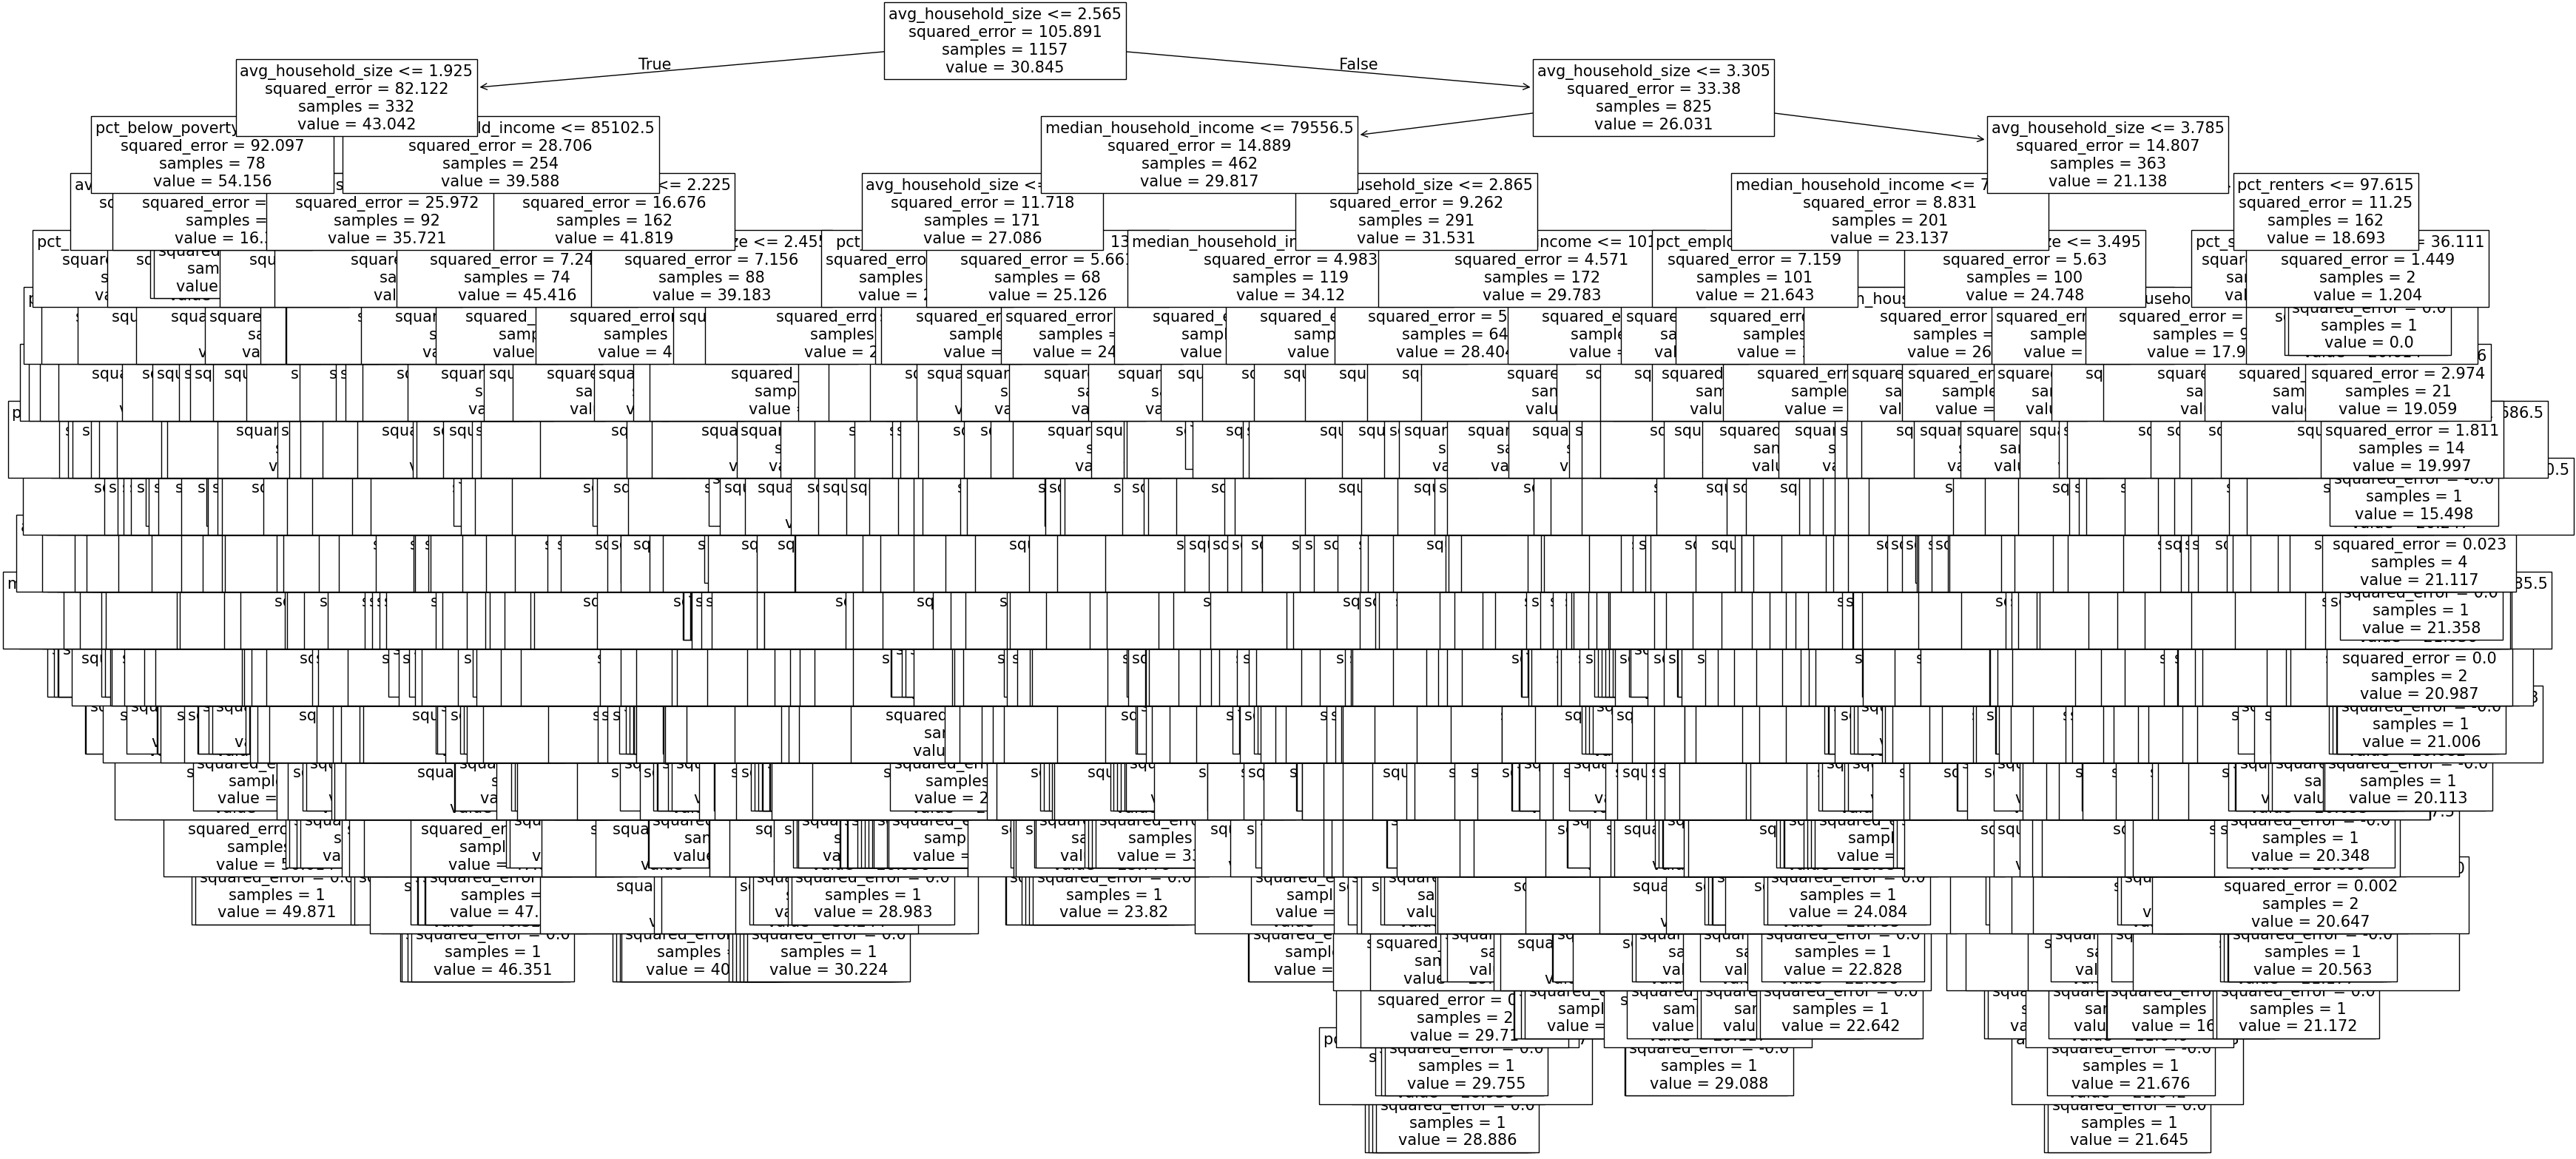

In [10]:
# this is a start, and gives a sense of the complexity of the model
# but you might want to plot just a portion of the tree. 

e = rf.estimators_[0]

from sklearn import tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(40,20))  
_ = tree.plot_tree(e, feature_names = X_train.columns, fontsize=15, ax = ax)

1.6043939756444099


Text(0, 0.5, 'Predicted SNAP Gap')

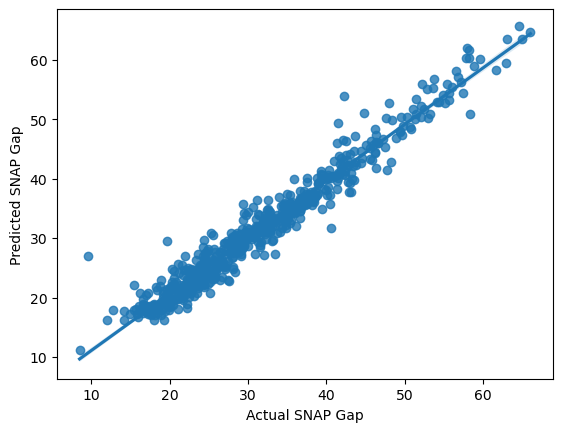

In [11]:
# your code here
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

# I used mean absolute error
print(metrics.mean_absolute_error(y_test, y_pred))

# but the scatter plot is more helpful to me
fig, ax = plt.subplots()
sns.regplot(x=y_test, y=y_pred, ax=ax)
ax.set_xlabel('Actual SNAP Gap')
ax.set_ylabel('Predicted SNAP Gap')

In [12]:
col_labels = {
    'avg_household_size': 'Average household size',
    'median_household_income': 'Median household income',
    'pct_seniors': 'Percent seniors (65+)',
    'pct_hispanic': 'Percent Hispanic or Latino',
    'pct_black': 'Percent Black (non-Hispanic)',
    'pct_asian': 'Percent Asian (non-Hispanic)',
    'pct_below_poverty': 'Percent below poverty',
    'pct_employed': 'Percent employed',
    'pct_college_undergrad': 'Percent undergrad students',
    'pct_grad_students': 'Percent graduate students',
    'pct_renters': 'Percent renters',
    'rent_burdened_total': 'Total rent-burdened households',
    'pct_rent_burdened': 'Percent rent-burdened',
    'pct_no_internet': 'Percent without internet access'
}

Average household size
Median household income
Percent below poverty
Percent without internet access
Percent Hispanic or Latino
Percent employed
Percent renters
Percent Black (non-Hispanic)
Percent undergrad students
Percent seniors (65+)


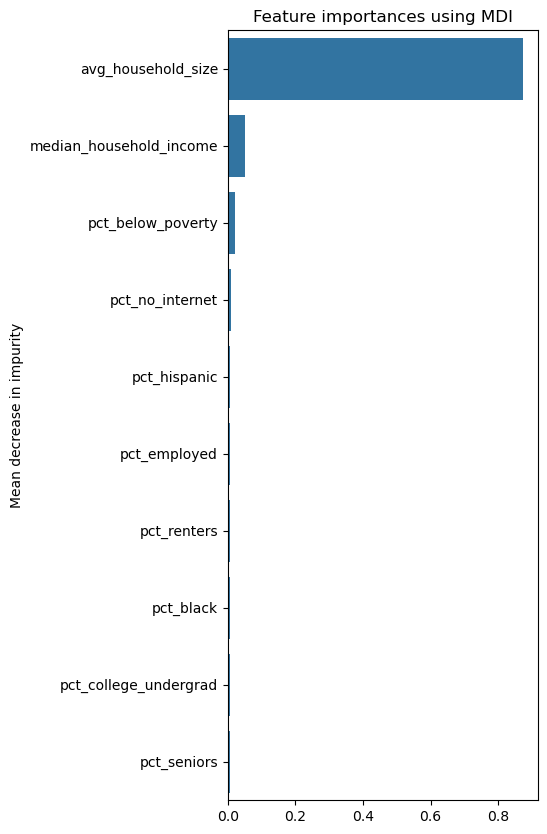

In [13]:
# code from https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

import numpy as np
import seaborn as sns


importances = rf.feature_importances_

# convert to a series, and give the index labels from our X_train dataframe
forest_importances = pd.Series(importances, index=X_train.columns)

# get the standard deviations to be able to plot the error bars
# acutally, these are no longer supported (for now) in seaborn, so we won't plot them
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

# sort the importances in descending order
forest_importances.sort_values(inplace=True, ascending=False)

# let's plot just the top 10

fig, ax = plt.subplots(figsize=(4,10))
sns.barplot(x=forest_importances.values[:10], y=forest_importances.index[:10], ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")

# let's find out what those variable are
# it would be better to actually change the axis tick label, but this is quick and dirty

for var in forest_importances.index.values[:10]:
    print(col_labels.get(var, var))  # fallback to the raw variable name if not found

### Aggregate to SPAs

In [56]:
import geopandas as gpd

spas = gpd.read_file('/Users/markwoody/Desktop/UP 213/UP213Final/final/Service_Planning_Areas_2022_view_8558881845522833049.zip')
spas = spas.to_crs(epsg=4326)
spas.head(7)

,SPA,SPA_NAME,ABBV,LABEL,SPA_NUM,geometry
0,1,Antelope Valley,ATV,SPA 1,1,"POLYGON ((-117.65523 34.39722, -117.65524 34.3..."
1,2,San Fernando,SFV,SPA 2,2,"POLYGON ((-118.7659 34.75362, -118.77967 34.75..."
2,3,San Gabriel,SGV,SPA 3,3,"POLYGON ((-117.97228 34.43878, -117.9723 34.43..."
3,4,Metro,MET,SPA 4,4,"POLYGON ((-118.30434 34.15884, -118.30283 34.1..."
4,5,West,W,SPA 5,5,"POLYGON ((-118.94469 34.045, -118.94463 34.045..."
5,6,South,S,SPA 6,6,"POLYGON ((-118.34542 34.03996, -118.34471 34.0..."
6,7,East,E,SPA 7,7,"MULTIPOLYGON (((-118.1741 33.81892, -118.17414..."


In [16]:
# Load LA County tract shapefile
tracts = gpd.read_file('/Users/markwoody/Desktop/UP 213/UP213Final/final/tl_2020_06_tract_LACounty.zip')
print(tracts.columns)
tracts.head(5)

# Create GEOID in both datasets
predictors['GEOID'] = predictors['state'] + predictors['county'] + predictors['tract']

# Set GEOID as index
tracts = tracts.set_index('GEOID')
predictors = predictors.set_index('GEOID')

# Join geometry from tracts into full census_snap
snap_tracts = predictors.join(tracts[['geometry']], how='inner')
snap_tracts = gpd.GeoDataFrame(snap_tracts, geometry='geometry', crs='EPSG:4326')
snap_tracts.head(5)

Index(['STATEFP', 'COUNTYFP', 'TRACTCE', 'GEOID', 'NAME', 'NAMELSAD', 'MTFCC',
       'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON', 'Shape_Leng',
       'Shape_Area', 'geometry'],
      dtype='object')


,foreign_born_total,foreign_born_non_citizen,foreign_born_non_citizen_latam,male_65_66,male_67_69,male_70_74,male_75_79,male_80_84,male_85_up,female_65_66,...,pct_below_poverty,pct_employed,pct_college_undergrad,pct_grad_students,pct_renters,rent_burdened_total,pct_rent_burdened,pct_no_internet,snap_gap,geometry
GEOID,,,,,,,,,,,,,,,,,,,,,
06037101110,1608,347,174,101,120,55,50,63,16,75,...,11.701082,93.125811,32.312253,3.260870,48.780488,399,52.500000,8.023107,31.342183,"POLYGON ((-118.30229 34.2587, -118.30091 34.25..."
06037101122,2122,347,35,49,66,149,54,32,115,71,...,6.385022,90.264317,31.619537,5.784062,22.103767,217,69.774920,1.350391,29.932789,"POLYGON ((-118.30334 34.27371, -118.3033 34.27..."
06037101220,1559,600,300,13,50,74,27,34,0,37,...,17.763541,91.412742,21.700224,3.355705,56.079587,329,43.232589,6.190125,30.081538,"POLYGON ((-118.28593 34.25227, -118.28592 34.2..."
06037101221,2100,761,313,65,57,100,19,0,188,16,...,14.300438,96.729958,26.835902,14.143246,77.815239,793,68.717504,16.250843,27.054883,"POLYGON ((-118.29945 34.25598, -118.29792 34.2..."
06037101222,1414,456,384,23,49,38,16,0,28,103,...,13.884555,93.887147,34.913793,6.465517,92.088608,483,55.326460,11.919831,25.897036,"POLYGON ((-118.29434 34.25233, -118.29318 34.2..."


In [30]:
spas = gpd.read_file('/Users/markwoody/Desktop/UP 213/UP213Final/final/Service_Planning_Areas_2022_view_8558881845522833049.zip')
spas = spas.to_crs(epsg=4326)
spas.head(5)

# Spatial join 
tracts_spa = gpd.sjoin(snap_tracts, spas, how='left', predicate='within')
tracts_spa.head(5)

,foreign_born_total,foreign_born_non_citizen,foreign_born_non_citizen_latam,male_65_66,male_67_69,male_70_74,male_75_79,male_80_84,male_85_up,female_65_66,...,pct_rent_burdened,pct_no_internet,snap_gap,geometry,index_right,SPA,SPA_NAME,ABBV,LABEL,SPA_NUM
GEOID,,,,,,,,,,,,,,,,,,,,,
06037101110,1608,347,174,101,120,55,50,63,16,75,...,52.500000,8.023107,31.342183,"POLYGON ((-118.30229 34.2587, -118.30091 34.25...",1.0,2,San Fernando,SFV,SPA 2,2.0
06037101122,2122,347,35,49,66,149,54,32,115,71,...,69.774920,1.350391,29.932789,"POLYGON ((-118.30334 34.27371, -118.3033 34.27...",1.0,2,San Fernando,SFV,SPA 2,2.0
06037101220,1559,600,300,13,50,74,27,34,0,37,...,43.232589,6.190125,30.081538,"POLYGON ((-118.28593 34.25227, -118.28592 34.2...",1.0,2,San Fernando,SFV,SPA 2,2.0
06037101221,2100,761,313,65,57,100,19,0,188,16,...,68.717504,16.250843,27.054883,"POLYGON ((-118.29945 34.25598, -118.29792 34.2...",1.0,2,San Fernando,SFV,SPA 2,2.0
06037101222,1414,456,384,23,49,38,16,0,28,103,...,55.326460,11.919831,25.897036,"POLYGON ((-118.29434 34.25233, -118.29318 34.2...",1.0,2,San Fernando,SFV,SPA 2,2.0


In [58]:
antelope_valley = tracts_spa[tracts_spa['SPA_NUM'] == 1]
san_fernando = tracts_spa[tracts_spa['SPA_NUM'] == 2]
san_gabriel = tracts_spa[tracts_spa['SPA_NUM'] == 3]
metro = tracts_spa[tracts_spa['SPA_NUM'] == 4]
west = tracts_spa[tracts_spa['SPA_NUM'] == 5]
south = tracts_spa[tracts_spa['SPA_NUM'] == 6]
east = tracts_spa[tracts_spa['SPA_NUM'] == 7]

In [64]:
# Specify x and y
xvars = ['avg_household_size', 'median_household_income',
 'pct_seniors',
 'pct_hispanic',
 'pct_black',
 'pct_asian',
 'pct_below_poverty',
 'pct_employed',
 'pct_college_undergrad',
 'pct_renters',
 'pct_rent_burdened',
 'pct_no_internet']

yvar = 'snap_gap'

# Create a dataframe with no NaNs
df_to_fit = san_fernando[xvars+[yvar]].dropna()

# train test split
X_train, X_test, y_train, y_test = train_test_split(
    df_to_fit[xvars], df_to_fit[yvar], test_size = 0.25, random_state = 1)

# initialize the random forest classifer object
rf = RandomForestRegressor(n_estimators = 50, random_state = 1)

# now fit the model
rf.fit(X_train, y_train)

# make predictions
y_pred = rf.predict(X_test)

Average household size
Median household income
Percent renters
Percent Hispanic or Latino
Percent below poverty
Percent without internet access
Percent Black (non-Hispanic)
Percent employed
Percent Asian (non-Hispanic)
Percent seniors (65+)


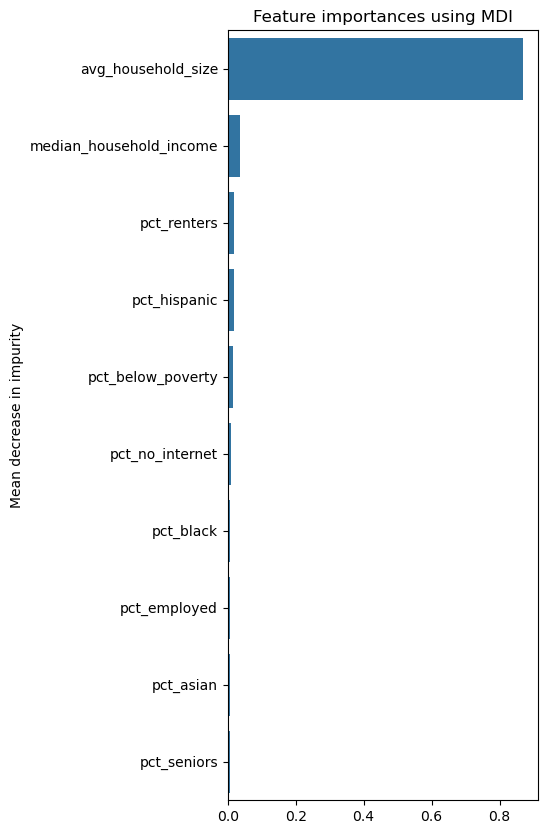

In [66]:
# code from https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

import numpy as np
import seaborn as sns


importances = rf.feature_importances_

# convert to a series, and give the index labels from our X_train dataframe
forest_importances = pd.Series(importances, index=X_train.columns)

# get the standard deviations to be able to plot the error bars
# acutally, these are no longer supported (for now) in seaborn, so we won't plot them
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

# sort the importances in descending order
forest_importances.sort_values(inplace=True, ascending=False)

# let's plot just the top 10

fig, ax = plt.subplots(figsize=(4,10))
sns.barplot(x=forest_importances.values[:10], y=forest_importances.index[:10], ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")

# let's find out what those variable are
# it would be better to actually change the axis tick label, but this is quick and dirty

for var in forest_importances.index.values[:10]:
    print(col_labels.get(var, var))  # fallback to the raw variable name if not found